In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
from osgeo import osr
import math

In [18]:
ds = gdal.Open("lamina_A010050_20220810T211048.tif")
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001ECAD86D230> >

In [3]:
print('File list:', ds.GetFileList())

File list: ['lamina_A010050_20220810T211048.tif']


In [4]:
print('Width:', ds.RasterXSize)
print('Height:', ds.RasterYSize)

Width: 24830
Height: 24825


In [5]:
print('Coordinate system:', ds.GetProjection())

Coordinate system: PROJCS["WGS 84 / UTM zone 21S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-57],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32721"]]


In [6]:
gt = ds.GetGeoTransform()
gt

(823180.0, 5.034504508079338, 0.0, 9773375.657077534, 0.0, -5.035523265778328)

In [9]:
print('Origin:', (gt[0], gt[3]))
print('Pixel size:', (gt[1], gt[5]))

Origin: (823180.0, 9773375.657077534)
Pixel size: (5.034504508079338, -5.035523265778328)


In [10]:
print('Upper Left Corner:', gdal.ApplyGeoTransform(gt,0,0))
print('Upper Right Corner:', gdal.ApplyGeoTransform(gt,ds.RasterXSize,0))
print('Lower Left Corner:', gdal.ApplyGeoTransform(gt,0,ds.RasterYSize))
print('Lower Right Corner:', gdal.ApplyGeoTransform(gt,ds.RasterXSize,ds.RasterYSize))
print('Center:', gdal.ApplyGeoTransform(gt,ds.RasterXSize/2,ds.RasterYSize/2))

Upper Left Corner: [823180.0, 9773375.657077534]
Upper Right Corner: [948186.74693561, 9773375.657077534]
Lower Left Corner: [823180.0, 9648368.792004587]
Lower Right Corner: [948186.74693561, 9648368.792004587]
Center: [885683.373467805, 9710872.22454106]


In [11]:
print('Metadata:', ds.GetMetadata())

Metadata: {'AREA_OR_POINT': 'Area'}


In [12]:
print('Image Structure Metadata:', ds.GetMetadata('IMAGE_STRUCTURE'))

Image Structure Metadata: {'COMPRESSION': 'LZW', 'INTERLEAVE': 'BAND'}


In [13]:
print('Number of Bands:', ds.RasterCount)

Number of Bands: 1


In [16]:
for i in range(1, ds.RasterCount+1):
        band = ds.GetRasterBand(i) #in GDAL, band are indexed starting at 1!
        interp = band.GetColorInterpretation()
        interp_name = gdal.GetColorInterpretationName(interp)
        (w,h)=band.GetBlockSize()
        print('Band {0:d}, block size {1:d} {2:d}, color interp {3:s}'.format(i,w,h,interp_name))
        ovr_count = band.GetOverviewCount()
        for j in range(ovr_count):
                ovr_band = band.GetOverview(j) #but overview bands starting at 0
                print(' Overview %d: %dx%d'%(j, over_band.XSize, ovr_band.YSize))

Band 1, block size 512 512, color interp Gray


In [14]:
!gdalinfo -stats lamina_A010050_20220810T211048.tif

Driver: GTiff/GeoTIFF
Files: lamina_A010050_20220810T211048.tif
Size is 24830, 24825
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 21S",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 21S",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-57,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG

In [17]:
del ds  #Liberando memória

In [19]:
for i in range(1, ds.RasterCount+1):
        band = ds.GetRasterBand(i)
        (minimun, maximun, mean, stddev) = band.ComputeStatistics(False)
        print('Band{:d}, min={:.3f}, max={:.3f}, mean={:.3f}, stddev={:.3f}'.format(i, minimun, maximun, mean, stddev))

Band1, min=1.000, max=7.000, mean=3.631, stddev=1.289


In [20]:
band = ds.GetRasterBand(1)

In [22]:
data = band.ReadAsArray()
data

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

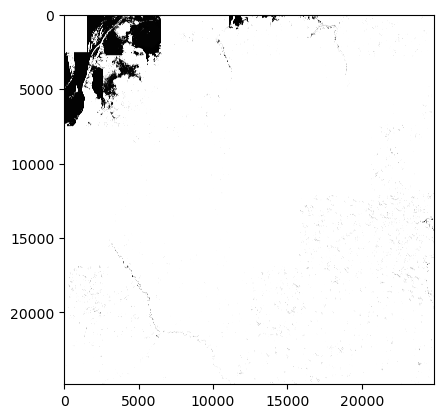

In [23]:
plt.imshow(data, cmap='gray')